In [9]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [10]:
onecall = True  # 8 days
#onecall = False # 5 days

In [11]:

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(base_url).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


In [12]:
# get data 8 days forecast

API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = get_location()
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '8 days'
# request data
try:
    print('Requesting json data')
    onecall_data = requests.get(base_url).json()
    #print(onecall_data)
except:
    exit()
 

Requesting json data


Creating dataframe:  8 days
Converting timestamp to human date
Selecting columns
Save to CSV
dt                                                   03/08/2024
sunrise                                                06:27:01
sunset                                                 21:26:26
moonrise                                               04:42:00
moonset                                                21:30:00
moon_phase                                                 0.97
temp          {'day': 23.32, 'min': 17.96, 'max': 24.24, 'ni...
feels_like    {'day': 23.22, 'night': 20.65, 'eve': 21.97, '...
pressure                                                   1014
humidity                                                     58
dew_point                                                  14.6
wind_speed                                                 4.55
wind_deg                                                    274
wind_gust                                                  8.18
weather    

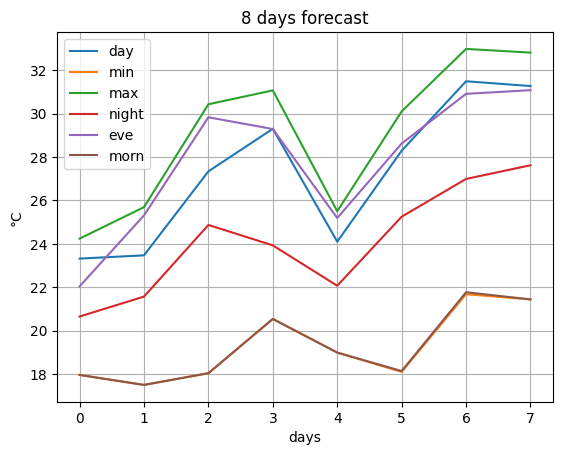

In [13]:

# make dataframe and save
print('Creating dataframe: ', data_for)

df = onecall_data['daily']
_8days = pd.DataFrame.from_records(df)
print('Converting timestamp to human date')
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)            

print('Selecting columns')
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:19]
focus_idx = _8days.keys()[focus]

status2 = pd.DataFrame(_8days[focus_idx])
demain = status2.loc[1]

# zip
print('Save to CSV')
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv')
#pprint(onecall_data)
print(_8days.iloc[0])  # today

# plot temperature
l = []
for i in range(0,8):
    l.append(_8days.iloc[i].temp)

df = pd.DataFrame(l)
df.plot()
plt.title('8 days forecast')
plt.ylabel('°C')
plt.xlabel('days')
plt.grid()
plt.show()
    


In [14]:
   
# 5 days forecast

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(base_url).json()
    print(forecast)
except:
    exit()
    


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1722686400, 'main': {'temp': 22.91, 'feels_like': 22.85, 'temp_min': 22.91, 'temp_max': 25.8, 'pressure': 1014, 'sea_level': 1014, 'grnd_level': 1005, 'humidity': 61, 'temp_kf': -2.89}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': {'all': 100}, 'wind': {'speed': 3.44, 'deg': 245, 'gust': 4.83}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-03 12:00:00'}, {'dt': 1722697200, 'main': {'temp': 22.9, 'feels_like': 22.79, 'temp_min': 22.89, 'temp_max': 22.9, 'pressure': 1014, 'sea_level': 1014, 'grnd_level': 1005, 'humidity': 59, 'temp_kf': 0.01}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': {'all': 100}, 'wind': {'speed': 4.05, 'deg': 301, 'gust': 6.14}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-03 15:00:00'}, {'dt': 1722708000, 'main': {'temp': 22

In [18]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1722686400
main          {'temp': 22.91, 'feels_like': 22.85, 'temp_min...
weather       [{'id': 804, 'main': 'Clouds', 'description': ...
clouds                                             {'all': 100}
wind                  {'speed': 3.44, 'deg': 245, 'gust': 4.83}
visibility                                                10000
pop                                                         0.0
sys                                                {'pod': 'd'}
dt_txt                                      2024-08-03 12:00:00
rain                                                        NaN
Name: 0, dtype: object


In [21]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys',
       'dt_txt', 'rain', 'date', 'time', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'temp_kf'],
      dtype='object')

In [19]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['date','time','temp_max','temp_min']])


          date      time  temp_max  temp_min
0   03/08/2024  14:00:00     25.80     22.91
1   03/08/2024  17:00:00     22.90     22.89
2   03/08/2024  20:00:00     22.39     22.13
3   03/08/2024  23:00:00     20.65     20.65
4   04/08/2024  02:00:00     20.50     20.50
5   04/08/2024  05:00:00     18.56     18.56
6   04/08/2024  08:00:00     17.84     17.84
7   04/08/2024  11:00:00     20.94     20.94
8   04/08/2024  14:00:00     23.95     23.95
9   04/08/2024  17:00:00     25.60     25.60
10  04/08/2024  20:00:00     24.63     24.63
11  04/08/2024  23:00:00     21.57     21.57
12  05/08/2024  02:00:00     19.87     19.87
13  05/08/2024  05:00:00     18.50     18.50
14  05/08/2024  08:00:00     18.79     18.79
15  05/08/2024  11:00:00     23.83     23.83
16  05/08/2024  14:00:00     28.72     28.72
17  05/08/2024  17:00:00     30.43     30.43
18  05/08/2024  20:00:00     29.03     29.03
19  05/08/2024  23:00:00     24.87     24.87
20  06/08/2024  02:00:00     22.59     22.59
21  06/08/

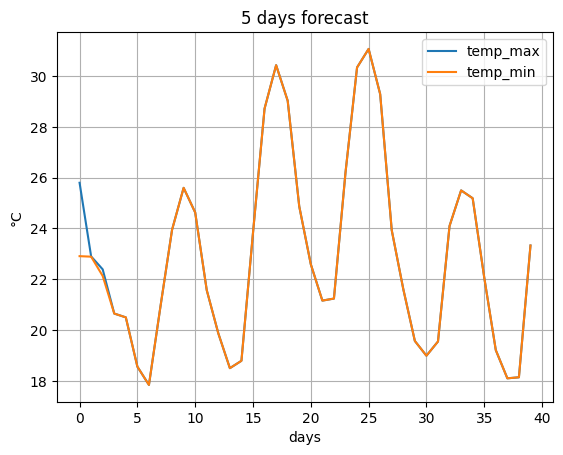

In [20]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast')
plt.ylabel('°C')
plt.xlabel('days')
plt.grid()
plt.show()
    